In [12]:
!pip install keras-tuner --upgrade

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/ushape.csv")
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       99 non-null     float64
 1   Y       99 non-null     float64
 2   class   99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


In [ ]:
X =df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense ,Dropout

#### How to select appropriate optimizer?

In [ ]:
import keras_tuner as kt

In [ ]:
def build_model(hp):
    model=Sequential()
    model.add(Dense(32,activation='relu',input_dim=2))
    model.add(Dense(1,activation="sigmoid"))
    optimizer=['adam','sgd','rmsprop','adadelta']
    model.compile(hp.Choice("optimizer",values=optimizer),loss="BinaryCrossentropy",metrics=['accuracy'])
    return model

In [ ]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5)

Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
optimizer: rmsprop
Score: 0.8999999761581421

Trial 2 summary
Hyperparameters:
optimizer: adam
Score: 0.800000011920929

Trial 1 summary
Hyperparameters:
optimizer: sgd
Score: 0.75

Trial 3 summary
Hyperparameters:
optimizer: adadelta
Score: 0.75


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [ ]:
model=tuner.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 129 (516.00 Byte)
Trainable params: 129 (516.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),initial_epoch=5,batch_size=32)

Epoch 6/100
3/3 [==============================] - 1s 72ms/step - loss: 0.6009 - accuracy: 0.7722 - val_loss: 0.5381 - val_accuracy: 0.9000
Epoch 7/100
3/3 [==============================] - 0s 12ms/step - loss: 0.5882 - accuracy: 0.7595 - val_loss: 0.5265 - val_accuracy: 0.9000
Epoch 8/100
3/3 [==============================] - 0s 13ms/step - loss: 0.5786 - accuracy: 0.7595 - val_loss: 0.5176 - val_accuracy: 0.8500
Epoch 9/100
3/3 [==============================] - 0s 11ms/step - loss: 0.5700 - accuracy: 0.7848 - val_loss: 0.5093 - val_accuracy: 0.8500
Epoch 10/100
3/3 [==============================] - 0s 11ms/step - loss: 0.5625 - accuracy: 0.7848 - val_loss: 0.5007 - val_accuracy: 0.8500
Epoch 11/100
3/3 [==============================] - 0s 12ms/step - loss: 0.5555 - accuracy: 0.7975 - val_loss: 0.4927 - val_accuracy: 0.8500
Epoch 12/100
3/3 [==============================] - 0s 11ms/step - loss: 0.5482 - accuracy: 0.7975 - val_loss: 0.4851 - val_accuracy: 0.9000
Epoch 13/100
3/3 

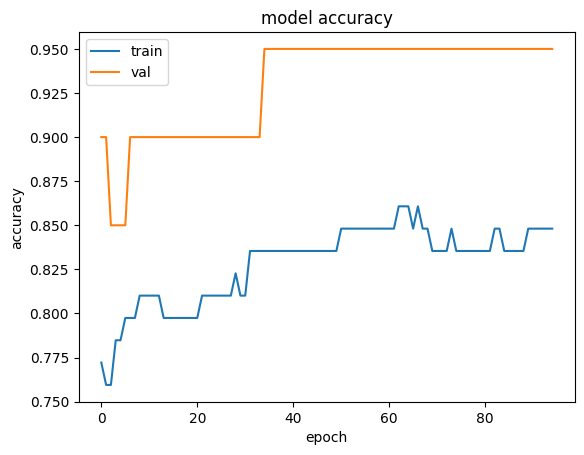

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### how to select right number of neurons ?

In [ ]:
def build_model(hp):
    model=Sequential()
    units=hp.Int("units",min_value=8,max_value=512,step=8)
    model.add(Dense(units=units,activation='relu',input_dim=2))
    model.add(Dense(1,activation="sigmoid"))
    optimizer=['adam','sgd','rmsprop','adadelta']
    model.compile(hp.Choice("optimizer",values=optimizer),loss="BinaryCrossentropy",metrics=['accuracy'])
    return model

In [ ]:
tuner_1=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory="my_dir",project_name="tuner_1")
tuner_1.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))
tuner_1.results_summary()

Trial 5 Complete [00h 00m 01s]
val_accuracy: 0.8500000238418579

Best val_accuracy So Far: 0.8500000238418579
Total elapsed time: 00h 00m 07s
Results summary
Results in my_dir/tuner_1
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
units: 480
optimizer: sgd
Score: 0.8500000238418579

Trial 0 summary
Hyperparameters:
units: 464
optimizer: adadelta
Score: 0.699999988079071

Trial 3 summary
Hyperparameters:
units: 168
optimizer: adadelta
Score: 0.699999988079071

Trial 2 summary
Hyperparameters:
units: 88
optimizer: adadelta
Score: 0.5

Trial 1 summary
Hyperparameters:
units: 16
optimizer: rmsprop
Score: 0.20000000298023224


In [ ]:
tuner_1.get_best_hyperparameters()[0].values

{'units': 480, 'optimizer': 'sgd'}

In [ ]:
model_1=tuner_1.get_best_models(num_models=1)[0]
model_1.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),initial_epoch=5,batch_size=32)

Epoch 6/100
3/3 [==============================] - 1s 135ms/step - loss: 0.6721 - accuracy: 0.8354 - val_loss: 0.6699 - val_accuracy: 0.9000
Epoch 7/100
3/3 [==============================] - 0s 29ms/step - loss: 0.6665 - accuracy: 0.8354 - val_loss: 0.6643 - val_accuracy: 0.9000
Epoch 8/100
3/3 [==============================] - 0s 26ms/step - loss: 0.6614 - accuracy: 0.8354 - val_loss: 0.6585 - val_accuracy: 0.9000
Epoch 9/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6561 - accuracy: 0.8354 - val_loss: 0.6534 - val_accuracy: 0.9000
Epoch 10/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6510 - accuracy: 0.8354 - val_loss: 0.6479 - val_accuracy: 0.9000
Epoch 11/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6461 - accuracy: 0.8354 - val_loss: 0.6432 - val_accuracy: 0.9000
Epoch 12/100
3/3 [==============================] - 0s 28ms/step - loss: 0.6413 - accuracy: 0.8354 - val_loss: 0.6384 - val_accuracy: 0.9000
Epoch 13/100
3/3

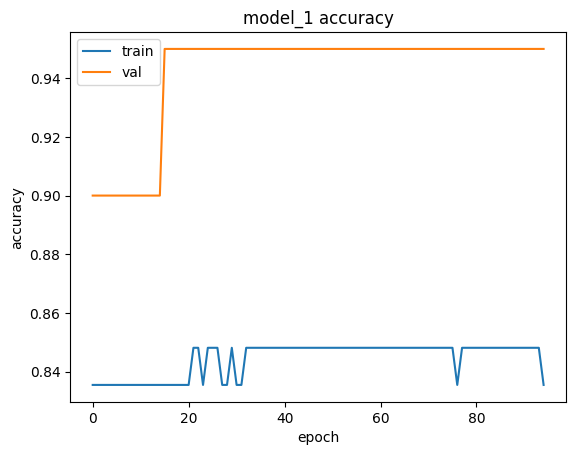

In [ ]:
plt.plot(model_1.history.history['accuracy'])
plt.plot(model_1.history.history['val_accuracy'])
plt.title('model_1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### how to select number of layers in neural network?

In [ ]:
def build_model(hp):
    model=Sequential()
    units=hp.Int("units",min_value=8,max_value=512,step=8)
    model.add(Dense(units=units,activation='relu',input_dim=2))
    for i in range(hp.Int("n_layers",min_value=1,max_value=10)):
        model.add(Dense(units=hp.Int("units" + str(i),min_value=8,max_value=512,step=8),activation="relu"))
    model.add(Dense(1,activation="sigmoid"))
    optimizer=['adam','sgd','rmsprop','adadelta']
    model.compile(hp.Choice("optimizer",values=optimizer),loss="BinaryCrossentropy",metrics=['accuracy'])
    return model

In [ ]:
tuner_2=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory="my_dir",project_name="tuner_2")
tuner_2.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))
tuner_2.results_summary()

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.949999988079071

Best val_accuracy So Far: 0.949999988079071
Total elapsed time: 00h 00m 11s
Results summary
Results in my_dir/tuner_2
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
units: 504
n_layers: 1
units0: 232
optimizer: adam
Score: 0.949999988079071

Trial 2 summary
Hyperparameters:
units: 16
n_layers: 7
units0: 312
optimizer: adam
units1: 208
units2: 200
units3: 232
units4: 248
units5: 88
units6: 144
units7: 336
units8: 144
units9: 472
Score: 0.949999988079071

Trial 3 summary
Hyperparameters:
units: 280
n_layers: 5
units0: 280
optimizer: rmsprop
units1: 480
units2: 384
units3: 128
units4: 424
units5: 440
units6: 424
units7: 416
units8: 416
units9: 208
Score: 0.949999988079071

Trial 4 summary
Hyperparameters:
units: 32
n_layers: 4
units0: 480
optimizer: adam
units1: 432
units2: 136
units3: 472
units4: 328
units5: 144
units6: 512
units7: 272
units8: 360
units9: 240
Score: 0

In [ ]:
tuner_2.get_best_hyperparameters()[0].values

{'units': 504, 'n_layers': 1, 'units0': 232, 'optimizer': 'adam'}

In [ ]:
model_2=tuner_2.get_best_models(num_models=1)[0]
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 504)               1512      
                                                                 
 dense_1 (Dense)             (None, 232)               117160    
                                                                 
 dense_2 (Dense)             (None, 1)                 233       
                                                                 
Total params: 118905 (464.47 KB)
Trainable params: 118905 (464.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),initial_epoch=5,batch_size=32)

Epoch 6/100
3/3 [==============================] - 1s 76ms/step - loss: 0.5190 - accuracy: 0.8228 - val_loss: 0.4319 - val_accuracy: 0.9500
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 0.4491 - accuracy: 0.8354 - val_loss: 0.3462 - val_accuracy: 0.9500
Epoch 8/100
3/3 [==============================] - 0s 13ms/step - loss: 0.4042 - accuracy: 0.8354 - val_loss: 0.2779 - val_accuracy: 0.9500
Epoch 9/100
3/3 [==============================] - 0s 13ms/step - loss: 0.3835 - accuracy: 0.8228 - val_loss: 0.2271 - val_accuracy: 0.9500
Epoch 10/100
3/3 [==============================] - 0s 16ms/step - loss: 0.3684 - accuracy: 0.8354 - val_loss: 0.1991 - val_accuracy: 0.9500
Epoch 11/100
3/3 [==============================] - 0s 13ms/step - loss: 0.3666 - accuracy: 0.8354 - val_loss: 0.1846 - val_accuracy: 0.9500
Epoch 12/100
3/3 [==============================] - 0s 14ms/step - loss: 0.3609 - accuracy: 0.8481 - val_loss: 0.1911 - val_accuracy: 0.9000
Epoch 13/100
3/3 

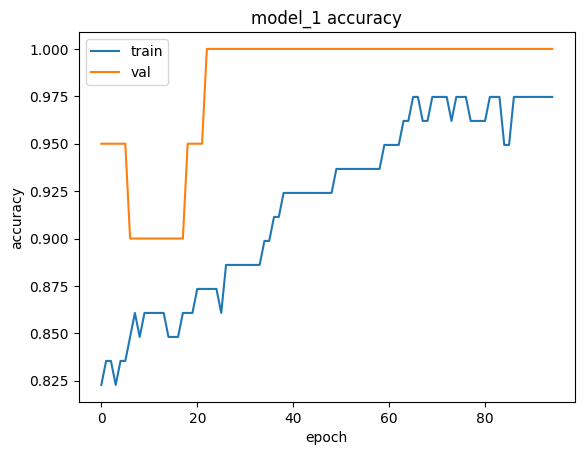

In [ ]:
plt.plot(model_2.history.history['accuracy'])
plt.plot(model_2.history.history['val_accuracy'])
plt.title('model_1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Final stage
### How to choose the Activation Function ?

In [ ]:
def build_model(hp):
    model=Sequential()
    counter=0
    for i in range(hp.Int("n_layers",min_value=1,max_value=10)):
        if counter==0:
            model.add(Dense
             (units=hp.Int("units" + str(i),min_value=8,max_value=512,step=8),
              activation=hp.Choice("activation" + str(i),values=["relu","sigmoid",'tanh']),
              input_dim=2))
            model.add(Dropout(hp.Choice("dropout"+ str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        else:
            model.add(Dense
             (units=hp.Int("units" + str(i),min_value=8,max_value=512,step=8),
              activation=hp.Choice("activation"+ str(i),values=["relu","sigmoid",'tanh'])))
            model.add(Dropout(hp.Choice("dropout"+ str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        counter+=1
    model.add(Dense(1,activation="sigmoid"))
    optimizer=['adam','sgd','rmsprop','adadelta']
    model.compile(hp.Choice("optimizer",values=optimizer),loss="BinaryCrossentropy",metrics=['accuracy'])
    return model

In [ ]:
tuner_4=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory="my_dir",project_name="tuner_4")
tuner_4.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))
tuner_4.results_summary()

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.699999988079071

Best val_accuracy So Far: 0.8500000238418579
Total elapsed time: 00h 00m 10s
Results summary
Results in my_dir/tuner_5
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
n_layers: 2
units0: 80
activation0: tanh
dropout0: 0.2
optimizer: rmsprop
units1: 24
activation1: sigmoid
dropout1: 0.1
units2: 96
activation2: relu
dropout2: 0.3
units3: 232
activation3: sigmoid
dropout3: 0.8
units4: 16
activation4: tanh
dropout4: 0.8
units5: 464
activation5: tanh
dropout5: 0.8
units6: 24
activation6: relu
dropout6: 0.6
units7: 464
activation7: relu
dropout7: 0.2
units8: 328
activation8: relu
dropout8: 0.8
units9: 488
activation9: relu
dropout9: 0.3
Score: 0.8500000238418579

Trial 2 summary
Hyperparameters:
n_layers: 5
units0: 104
activation0: tanh
dropout0: 0.4
optimizer: adadelta
units1: 176
activation1: tanh
dropout1: 0.5
units2: 296
activation2: sigmoid
dropout2: 0.6
units3: 368
a

In [ ]:
tuner_4.get_best_hyperparameters()[0].values

{'n_layers': 2,
 'units0': 80,
 'activation0': 'tanh',
 'dropout0': 0.2,
 'optimizer': 'rmsprop',
 'units1': 24,
 'activation1': 'sigmoid',
 'dropout1': 0.1,
 'units2': 96,
 'activation2': 'relu',
 'dropout2': 0.3,
 'units3': 232,
 'activation3': 'sigmoid',
 'dropout3': 0.8,
 'units4': 16,
 'activation4': 'tanh',
 'dropout4': 0.8,
 'units5': 464,
 'activation5': 'tanh',
 'dropout5': 0.8,
 'units6': 24,
 'activation6': 'relu',
 'dropout6': 0.6,
 'units7': 464,
 'activation7': 'relu',
 'dropout7': 0.2,
 'units8': 328,
 'activation8': 'relu',
 'dropout8': 0.8,
 'units9': 488,
 'activation9': 'relu',
 'dropout9': 0.3}

In [ ]:
model_4=tuner_4.get_best_models(num_models=1)[0]
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                240       
                                                                 
 dense_1 (Dense)             (None, 24)                1944      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2209 (8.63 KB)
Trainable params: 2209 (8.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_4.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),initial_epoch=5,batch_size=32)

Epoch 6/100
3/3 [==============================] - 1s 72ms/step - loss: 0.5649 - accuracy: 0.8228 - val_loss: 0.5598 - val_accuracy: 0.9000
Epoch 7/100
3/3 [==============================] - 0s 11ms/step - loss: 0.5494 - accuracy: 0.8228 - val_loss: 0.5377 - val_accuracy: 0.9500
Epoch 8/100
3/3 [==============================] - 0s 12ms/step - loss: 0.5354 - accuracy: 0.8228 - val_loss: 0.5164 - val_accuracy: 0.9500
Epoch 9/100
3/3 [==============================] - 0s 11ms/step - loss: 0.5214 - accuracy: 0.8354 - val_loss: 0.4990 - val_accuracy: 0.9500
Epoch 10/100
3/3 [==============================] - 0s 11ms/step - loss: 0.5101 - accuracy: 0.8228 - val_loss: 0.4806 - val_accuracy: 0.9500
Epoch 11/100
3/3 [==============================] - 0s 11ms/step - loss: 0.4972 - accuracy: 0.8481 - val_loss: 0.4655 - val_accuracy: 0.9500
Epoch 12/100
3/3 [==============================] - 0s 12ms/step - loss: 0.4871 - accuracy: 0.8481 - val_loss: 0.4517 - val_accuracy: 0.9500
Epoch 13/100
3/3 

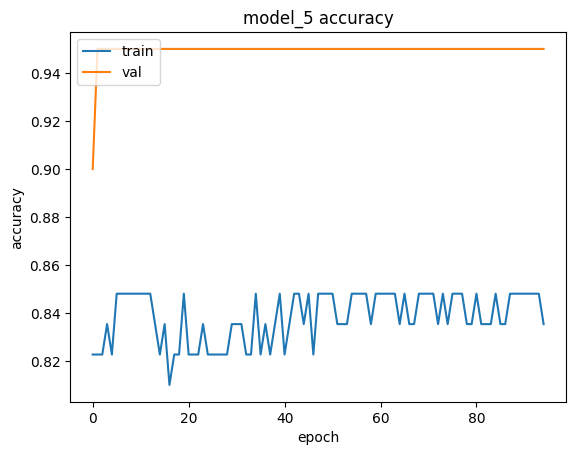

In [ ]:
plt.plot(model_4.history.history['accuracy'])
plt.plot(model_4.history.history['val_accuracy'])
plt.title('model_5 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Tuning Batch Size with a Simple Neural Network

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Experiment with different batch sizes
batch_sizes = [16, 32, 64, 128, 256, 512]
results = []

for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")

    # Use EarlyStopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model_4.fit(
        X_train, y_train,
        epochs=50,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        verbose=0
    )

    final_val_acc = history.history['val_accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]
    results.append((batch_size, final_val_acc, final_val_loss))
    print(f"Batch size: {batch_size}, Val Accuracy: {final_val_acc}, Val Loss: {final_val_loss}")


Training with batch size: 16
Batch size: 16, Val Accuracy: 0.949999988079071, Val Loss: 0.22529110312461853
Training with batch size: 32
Batch size: 32, Val Accuracy: 0.949999988079071, Val Loss: 0.2229856550693512
Training with batch size: 64
Batch size: 64, Val Accuracy: 0.949999988079071, Val Loss: 0.22378739714622498
Training with batch size: 128
Batch size: 128, Val Accuracy: 0.949999988079071, Val Loss: 0.22085264325141907
Batch size: 16, Val Accuracy: 0.949999988079071, Val Loss: 0.22529110312461853
Batch size: 32, Val Accuracy: 0.949999988079071, Val Loss: 0.2229856550693512
Batch size: 64, Val Accuracy: 0.949999988079071, Val Loss: 0.22378739714622498
Batch size: 128, Val Accuracy: 0.949999988079071, Val Loss: 0.22085264325141907


<ipython-input-69-3a7930eb3807>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Batch Size', y='Validation Accuracy', data=df,palette='muted')


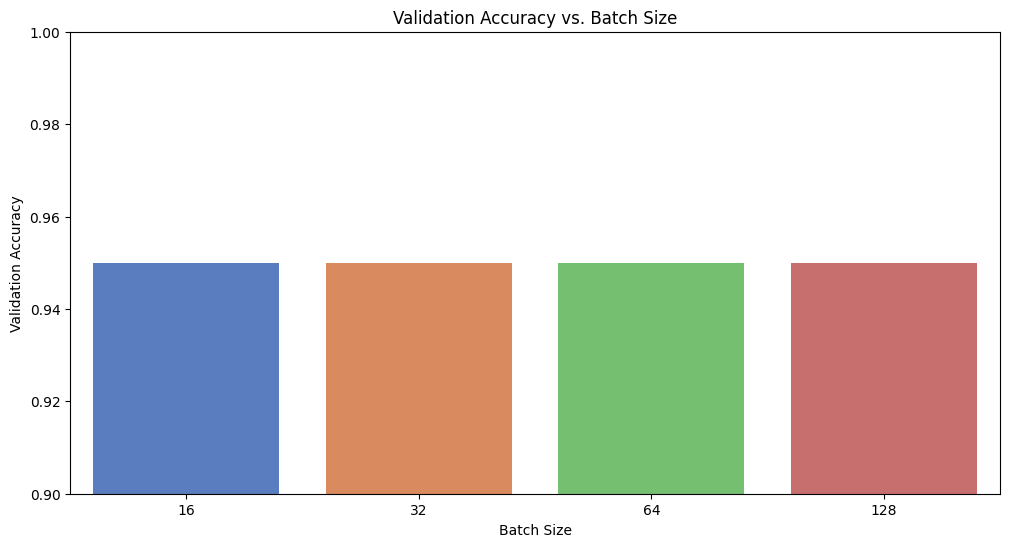

<ipython-input-69-3a7930eb3807>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Batch Size', y='Validation Loss', data=df, palette='muted')


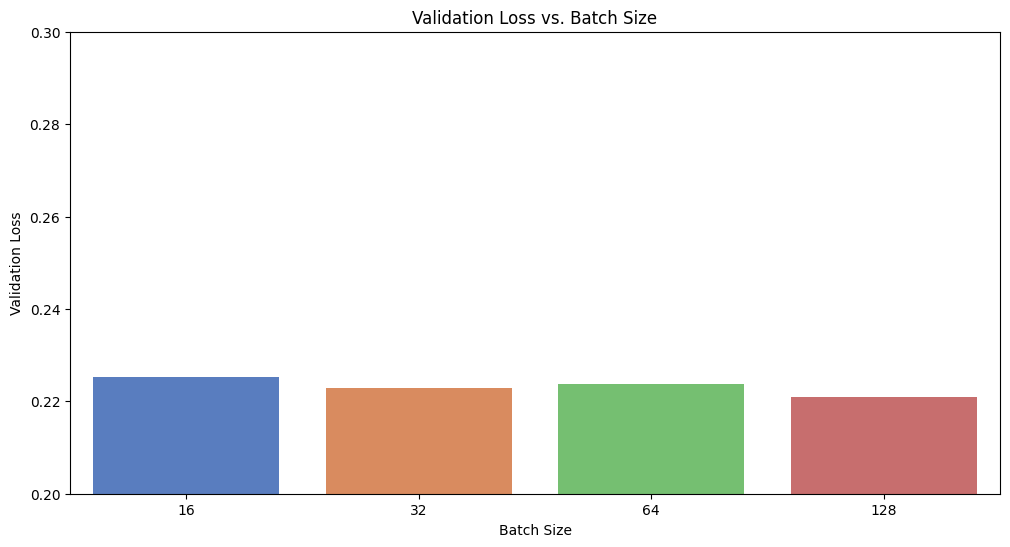

In [ ]:
import seaborn as sns
# Convert the results to a DataFrame
df = pd.DataFrame(results, columns=['Batch Size', 'Validation Accuracy', 'Validation Loss'])

# Plot Validation Accuracy as a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Batch Size', y='Validation Accuracy', data=df,palette='muted')
plt.title('Validation Accuracy vs. Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Validation Accuracy')
plt.ylim(0.9, 1.0)
plt.show()

# Plot Validation Loss as a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Batch Size', y='Validation Loss', data=df, palette='muted')
plt.title('Validation Loss vs. Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Validation Loss')
plt.ylim(0.2, 0.3)
plt.show()